In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [2]:
!gdown 1TdUywNbAevQvWef6zuDlJuqG-xL5cHJS

Downloading...
From: https://drive.google.com/uc?id=1TdUywNbAevQvWef6zuDlJuqG-xL5cHJS
To: /content/Cat62data_train.csv
100% 2.13k/2.13k [00:00<00:00, 8.49MB/s]


In [3]:
df = pd.read_csv('Cat62data_train.csv')

In [4]:
del df['Unnamed: 0']
df

,Month,y
0,2011-01,23341906
1,2011-02,22508980
2,2011-03,17134321
3,2011-04,11609845
4,2011-05,15947600
...,...,...
103,2019-08,19415353
104,2019-09,14866359
105,2019-10,11442528
106,2019-11,6780221


<Axes: >

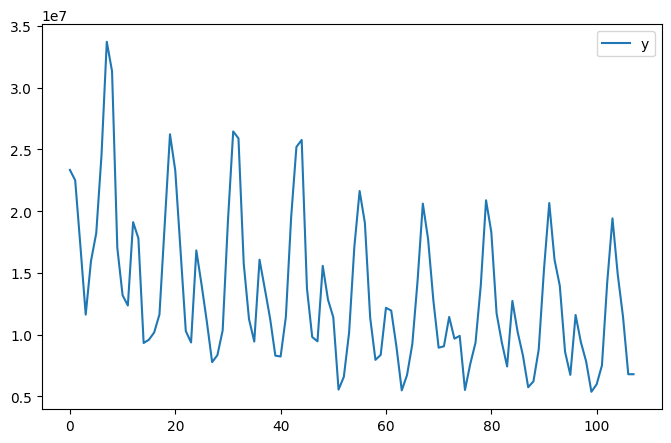

In [5]:
df.plot(figsize=(8,5))

In [6]:
import random

random_numbers = random.sample(range(108), 12)
random_numbers

[40, 46, 96, 26, 88, 52, 65, 5, 93, 4, 8, 70]

In [7]:
df_copy = df.copy()

In [8]:
for i in random_numbers:
  df_copy['y'].iloc[i] = np.nan

df_copy

<ipython-input-8-3c5acca44e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['y'].iloc[i] = np.nan


,Month,y
0,2011-01,23341906.0
1,2011-02,22508980.0
2,2011-03,17134321.0
3,2011-04,11609845.0
4,2011-05,NaN
...,...,...
103,2019-08,19415353.0
104,2019-09,14866359.0
105,2019-10,11442528.0
106,2019-11,6780221.0


In [9]:
# Define the number of iterations for the EM algorithm
num_iterations = 100

def mle_imputation(data, num_iterations):
    imputed_data = data.copy()
    missing_indices = imputed_data.index[imputed_data.isnull()]

    # Initialize missing values with the column mean
    imputed_data.loc[missing_indices] = imputed_data.mean()

    # Perform EM algorithm for MLE imputation
    for _ in range(num_iterations):
        # Expectation step
        for index in missing_indices:
            observed_indices = imputed_data.index[~imputed_data.isnull()]
            observed_values = imputed_data.loc[observed_indices]
            observed_mean = np.mean(observed_values)
            observed_std = np.std(observed_values)
            imputed_data.loc[index] = norm.pdf(imputed_data.loc[index], loc=observed_mean, scale=observed_std) * observed_mean

        # Maximization step
        observed_values = imputed_data.loc[~imputed_data.isnull()]
        imputed_data.loc[missing_indices] = np.mean(observed_values)

    return imputed_data

imputed_df = mle_imputation(df_copy['y'], num_iterations)
imputed_df

0      2.334191e+07
1      2.250898e+07
2      1.713432e+07
3      1.160984e+07
4      1.199957e+07
           ...     
103    1.941535e+07
104    1.486636e+07
105    1.144253e+07
106    6.780221e+06
107    6.779529e+06
Name: y, Length: 108, dtype: float64

<Axes: >

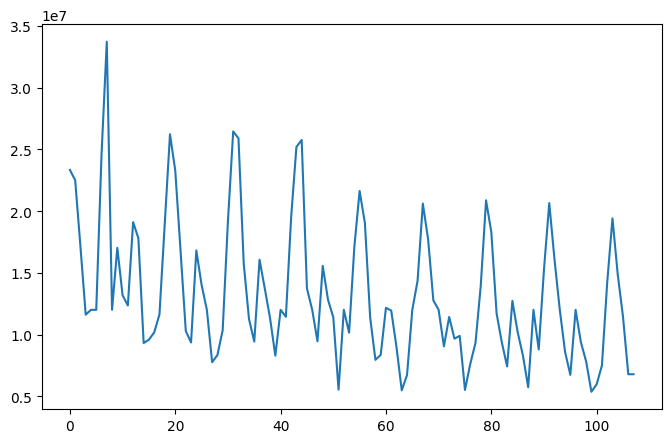

In [10]:
imputed_df.plot(figsize=(8,5))

In [11]:
sum = 0
for i in random_numbers:
  sum += ((df['y'].iloc[i] - imputed_df.iloc[i])/df['y'].iloc[i])**2

sum /= 12
mspe = sum*100
mspe

21.83204828802735